In [28]:
!pip install seaborn
!pip install sklearn
#!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 26.7 MB 32.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 99.2 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=7d2d19b4a552e068e1a3bc0b050001479e92de946d1bd50be78f48cc895b13e7
  Stored in directory: /home/at4932/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [19]:
import pandas as pd
import os
from pandas.plotting import table
from config.definitions import ROOT_DIR
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display
#import pyspark
# importing sparksession from
# pyspark.sql module
#from pyspark.sql import SparkSession
# creating sparksession and giving
# app name
#spark = SparkSession.builder.appName('sparkdf').getOrCreate()

In [29]:
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv(os.path.join(ROOT_DIR, 'data','raw', '2018.csv'))

In [21]:
df2 = df.drop(['CANCELLATION_CODE','CANCELLED','DIVERTED','Unnamed: 27'], axis=1)

#Drop all rows with NA
df2 = df2.dropna()

In [22]:
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352375 entries, 11 to 7213433
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1352375 non-null  object 
 1   OP_CARRIER           1352375 non-null  object 
 2   OP_CARRIER_FL_NUM    1352375 non-null  int64  
 3   ORIGIN               1352375 non-null  object 
 4   DEST                 1352375 non-null  object 
 5   CRS_DEP_TIME         1352375 non-null  int64  
 6   DEP_TIME             1352375 non-null  float64
 7   DEP_DELAY            1352375 non-null  float64
 8   TAXI_OUT             1352375 non-null  float64
 9   WHEELS_OFF           1352375 non-null  float64
 10  WHEELS_ON            1352375 non-null  float64
 11  TAXI_IN              1352375 non-null  float64
 12  CRS_ARR_TIME         1352375 non-null  int64  
 13  ARR_TIME             1352375 non-null  float64
 14  ARR_DELAY            1352375 non-null  float64
 1

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
11,2018-01-01,UA,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,129.0,72.0,80.0,48.0,316.0,121.0,0.0,8.0,0.0,0.0
14,2018-01-01,UA,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,73.0,121.0,118.0,99.0,763.0,0.0,11.0,0.0,0.0,62.0
15,2018-01-01,UA,2412,MCO,LAX,653,747.0,54.0,14.0,801.0,...,55.0,337.0,338.0,302.0,2218.0,54.0,0.0,1.0,0.0,0.0
16,2018-01-01,UA,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,...,25.0,386.0,339.0,319.0,2500.0,7.0,0.0,0.0,0.0,18.0
17,2018-01-01,UA,2410,RSW,EWR,1250,1337.0,47.0,12.0,1349.0,...,29.0,167.0,149.0,131.0,1068.0,29.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213412,2018-12-31,AA,1792,CMH,LAX,1622,1659.0,37.0,16.0,1715.0,...,36.0,312.0,311.0,291.0,1995.0,36.0,0.0,0.0,0.0,0.0
7213415,2018-12-31,AA,1794,CLT,RDU,1636,1635.0,-1.0,45.0,1720.0,...,18.0,61.0,80.0,32.0,130.0,0.0,0.0,18.0,0.0,0.0
7213417,2018-12-31,AA,1795,DSM,PHX,730,730.0,0.0,28.0,758.0,...,16.0,219.0,235.0,174.0,1149.0,0.0,0.0,16.0,0.0,0.0
7213429,2018-12-31,AA,1805,CLT,DTW,1632,1720.0,48.0,15.0,1735.0,...,33.0,116.0,101.0,75.0,500.0,33.0,0.0,0.0,0.0,0.0


In [23]:
#Getting summary statistics
delay_data = []

labels = ['Delay Type','Max Delay','Min Delay','Mean','Standard Deviation','Median']
delay_type =['DEP_DELAY','ARR_DELAY','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
delay_type2 =['Departure Delay','Arrival Delay','Carrier Delay','Weather Delay','Security Delay','Late Aircraft Delay']
delay_data.append(labels)


for data in delay_type:
    temp_list = []
    temp_list.append(delay_type2[delay_type.index(data)])
    temp_list.append(df2[data].max())
    temp_list.append(df2[data].min())
    temp_list.append("{0:.2f}".format(df2[data].mean()))
    temp_list.append("{0:.2f}".format(df2[data].std()))
    temp_list.append(df2[data].median())
    delay_data.append(temp_list)

display(HTML('<table><tr>{}</tr></table>'.format('</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in delay_data))))    

#save data as html file
df_delaydata = pd.DataFrame(delay_data[1:],columns = delay_data[0])

html = df_delaydata.to_html()
text_file = open('delay_data.html',"w")
text_file.write(html)
text_file.close()

Delay Type,Max Delay,Min Delay,Mean,Standard Deviation,Median
Departure Delay,2710.0,-47.0,59.92,84.23,38.0
Arrival Delay,2692.0,15.0,64.72,81.18,39.0
Carrier Delay,2109.0,0.0,19.46,58.91,0.0
Weather Delay,2692.0,0.0,3.64,30.00,0.0
Security Delay,987.0,0.0,0.09,3.17,0.0
Late Aircraft Delay,2454.0,0.0,25.65,49.79,3.0


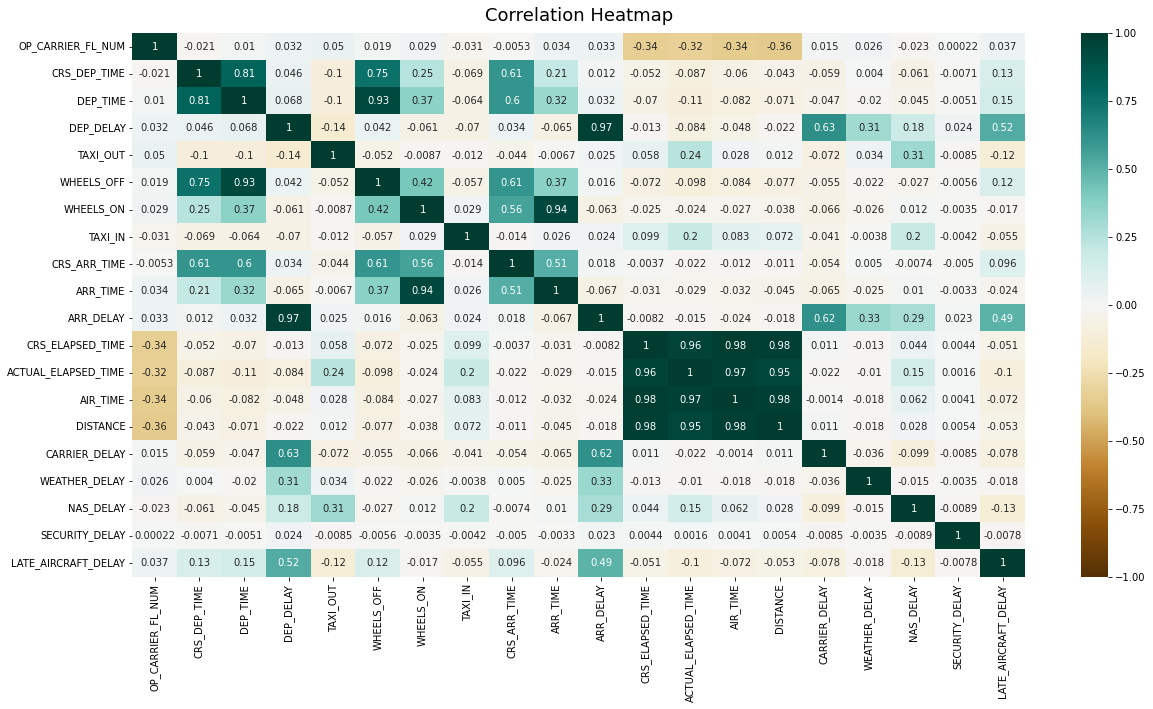

In [24]:
# Size of the heatmap.
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

In [26]:
#baseline model with reduced data
df_minimal = df2.drop(['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST','CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME'], axis=1).dropna()
df_minimal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352375 entries, 11 to 7213433
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   OP_CARRIER           1352375 non-null  object 
 1   DEP_DELAY            1352375 non-null  float64
 2   TAXI_OUT             1352375 non-null  float64
 3   TAXI_IN              1352375 non-null  float64
 4   ARR_TIME             1352375 non-null  float64
 5   ARR_DELAY            1352375 non-null  float64
 6   CRS_ELAPSED_TIME     1352375 non-null  float64
 7   ACTUAL_ELAPSED_TIME  1352375 non-null  float64
 8   AIR_TIME             1352375 non-null  float64
 9   DISTANCE             1352375 non-null  float64
 10  CARRIER_DELAY        1352375 non-null  float64
 11  WEATHER_DELAY        1352375 non-null  float64
 12  NAS_DELAY            1352375 non-null  float64
 13  SECURITY_DELAY       1352375 non-null  float64
 14  LATE_AIRCRAFT_DELAY  1352375 non-null  float64
dt

<AxesSubplot:>

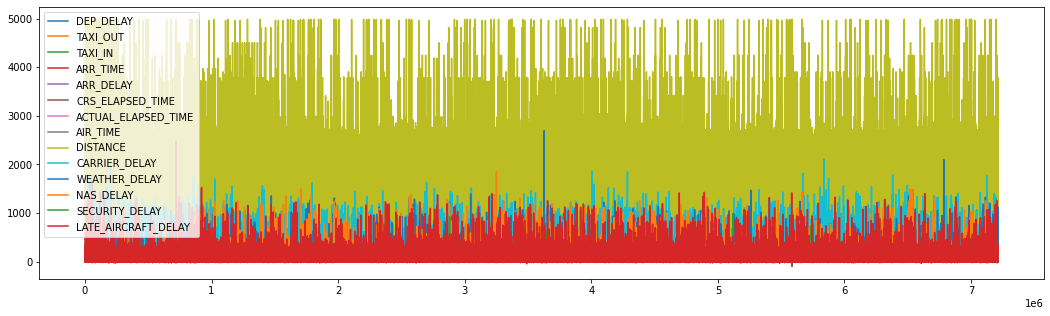

In [34]:
df_minimal.plot(figsize=(18,5))

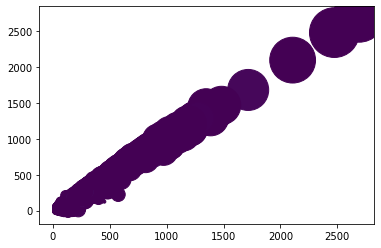

In [39]:
plt.scatter(df_minimal['ARR_DELAY'],df_minimal['DEP_DELAY'], df_minimal['WEATHER_DELAY'], df_minimal['CARRIER_DELAY'])

In [46]:
#X = pd.DataFrame(df_minimal['DEP_DELAY'], df_minimal['WEATHER_DELAY'], df_minimal['CARRIER_DELAY'], df_minimal['LATE_AIRCRAFT_DELAY'], df_minimal['SECURITY_DELAY'])
X = pd.DataFrame(df_minimal['DEP_DELAY'])
y = pd.DataFrame(df_minimal['ARR_DELAY'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

In [47]:
print(scores)

[0.9417129304069507, 0.9404511088605307, 0.9415872619895717]
